
# Project: Investigate a Dataset - Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset includes data for nearly 5000 movies from the Internet Movied Database (IMDb) released between the years 1916 and 2017. The data in the revenue column is adjusted for inflation as of 2017.

With this data, we will be answering the following questions:


   **Question 1:** What kinds of properties are associated with the highest grossing films?
   
   **Question 2** Which actors/actresses have appeared in the most films within the top 250 most profitable films?

   **Question 3** Who has directed the most films of the top 250 most profitable films?
   
   **Question 4** In what month are the most movies released of the top 500 most profitable films?




In [14]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline


SyntaxError: invalid syntax (<ipython-input-14-8096769b440e>, line 8)

<a id='wrangling'></a>
## Data Wrangling



### General Properties

Here I will open the csv file and preview the first few rows in order to get a sense of the data and what I will need in order to answer my questions. I will get a date range so that I know what years I am working with and if I need a more recent dataset.

Most of the data shown in the statistics of the dataset will not apply to my questions, but can be helpful to identify any major outliers that would be smart to consider before I move on to my project.

I will also use df.info() to identify the data types for each of my variables. 

In [2]:
#Reading CSV File

df = pd.read_csv('movies1.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Convert Release Date from str to date-time dtype
#Release date of newest and oldest movies in dataset

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = df['release_date']
print(df.release_date.max())
print(df.release_date.min())

2069-12-29 00:00:00
1970-01-03 00:00:00


In [4]:
# Total amount of rows and columns in the datset.
df.shape

(10866, 21)

In [5]:
#Statistics of Dataset
df.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

> ### Data Cleaning 

In [7]:
#Dropping Unnecessary Columns
df.drop(['id','homepage','tagline', 'overview','keywords', 'production_companies', 'runtime'], axis =1, inplace = True) 

Text(0.5, 0.95, 'Histograms Visualizing Budget, Popularity, Release Year, Revenue and Voting')

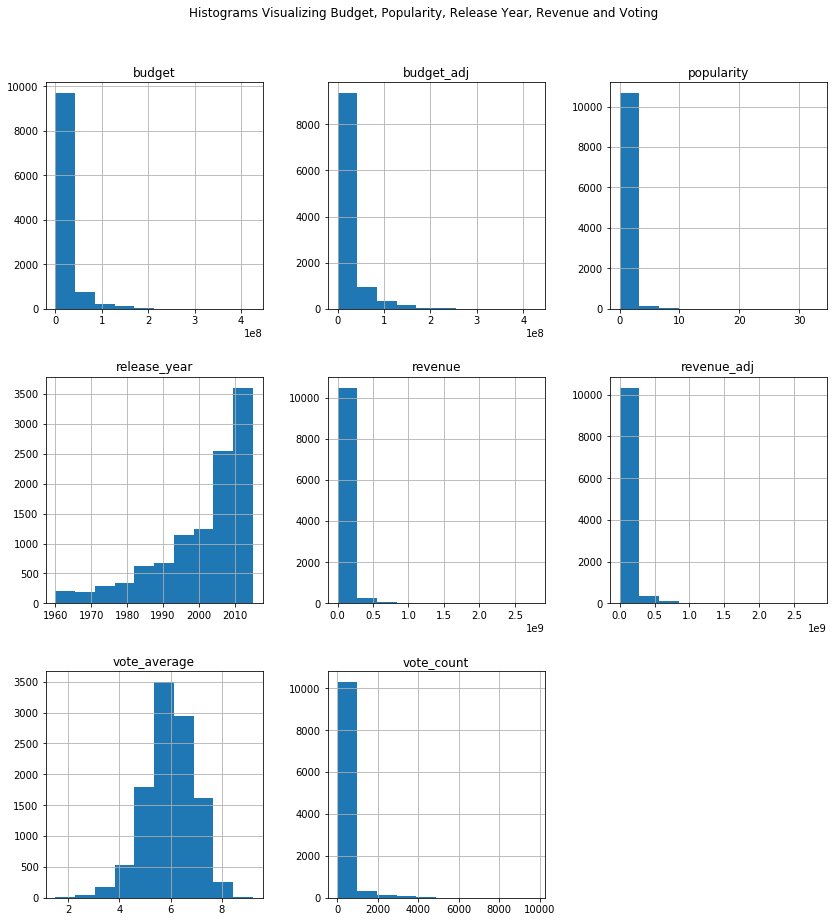

In [22]:
#Histogram of the Dataset
import pylab as pl
df.hist(figsize=[14,15])
pl.suptitle("Histograms Visualizing Budget, Popularity, Release Year, Revenue and Voting", y=.95)



In [ ]:
#Filling Missing numeric column values with mean 
df.fillna(df.mean(),inplace= True)

In [ ]:
#Replacing '0' with NAN in entire dataset
df = df.replace(0, np.nan)

#Removing and remaining null values in the dataset
df = df.dropna()

In [ ]:
#Testing Cleaned Dataset
df.describe()

In [ ]:
# Creating release_month column and deleting release_date column
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df.release_date.dt.month
df.drop(['release_date'], axis =1, inplace = True)


In [ ]:
df.head()

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question #1: What kinds of properties are associated with the highest grossing films?

In [ ]:
#Taking a sample of 100 entries and trying to find any relationship between other numeric variables. 
df_sample =df.sample(100)
g = sb.PairGrid(data = df_sample, vars = ['popularity', 'budget', 'revenue', 'vote_count', 'vote_average'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

g.fig.suptitle('Fig: Pairplot Visualizing Relationships Betweem Popularity, Budget, Revenue, Vote Count, Vote average', y=1.05)


In [ ]:
This plot shows the visual relationships between popularity, budget, revenue, vote_count, vote_average. From the plot we can see that revenue has a minor positive relationship with increasing popularity, budget, and vote count.

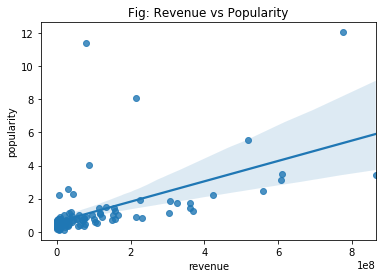

In [185]:
# plot correlation between revenue and popularity
sb.regplot(data = df_sample, x= 'revenue', y = 'popularity');
plt.title('Fig: Revenue vs Popularity');

As you can see from the chart, revenue has positive correlation with popularity.

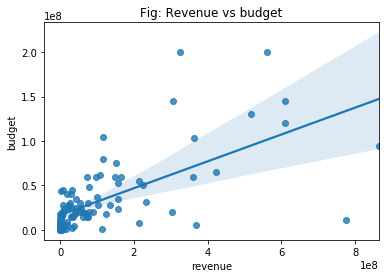

In [186]:
#plot correlation between revenue and budget
sb.regplot(data = df_sample, x= 'revenue', y = 'budget');
plt.title('Fig: Revenue vs budget');

As seen here, revenue has positive correlation with budget.

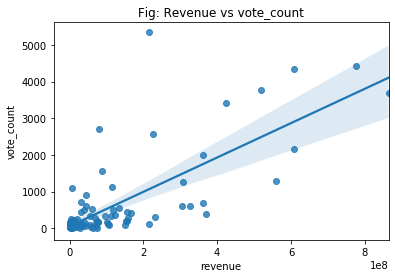

In [187]:
#plot correlation between revenue and vote count
sb.regplot(data = df_sample, x= 'revenue', y = 'vote_count');
plt.title('Fig: Revenue vs vote_count');

Revenue als has a positive correlation with vote count.

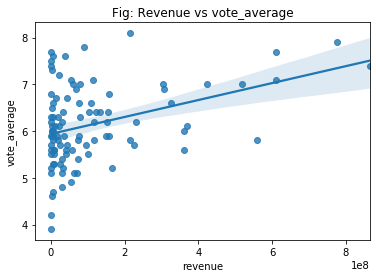

In [188]:
#plot correlation between revenue and vote average
sb.regplot(data = df_sample, x= 'revenue', y = 'vote_average');
plt.title('Fig: Revenue vs vote_average');

As you can see from this chart, the correlation between revenue and vote average is fairly weak.

## Question #2 Which actors/actresses have appeared in the most films within the top 250 most profitable films?

In [189]:
#Calculate the profit of all films in a new column:
df['profit'] = df['revenue']-df['budget']
df.head(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         3850 non-null   object 
 1   popularity      3850 non-null   float64
 2   budget          3850 non-null   float64
 3   revenue         3850 non-null   float64
 4   original_title  3850 non-null   object 
 5   cast            3850 non-null   object 
 6   director        3850 non-null   object 
 7   genres          3850 non-null   object 
 8   vote_count      3850 non-null   int64  
 9   vote_average    3850 non-null   float64
 10  release_year    3850 non-null   int64  
 11  budget_adj      3850 non-null   float64
 12  revenue_adj     3850 non-null   float64
 13  release_month   3850 non-null   int64  
 14  profit          3850 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 481.2+ KB


Text(0.5, 1.0, 'Fig: Most appearances by Actors/Actresses from Top 250 highest grossing films')

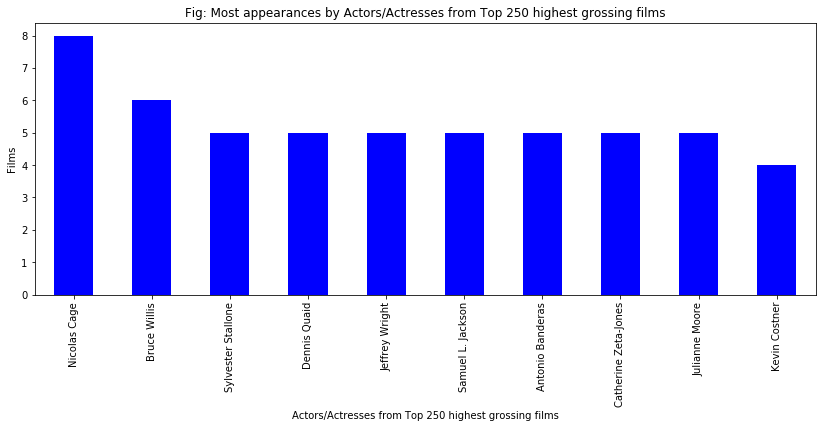

In [190]:
#Create a function that will return a barchart of the top 10 most appearances of an actor or actress.
def top10cast(x):
    top250 = df[[x,'cast']].sort_values(x).head(250)  
    top250 = top250.reset_index(); 
    column_values = list(top250.cast)
    cast = []
    for col_val in column_values:
        s = str(col_val)
        cast.extend(s.split('|'))
    a = pd.Series(cast)
    a.value_counts().head(10).plot(kind = 'bar',figsize=(14,5), color = 'Blue' );

#chart
top10cast('profit')
plt.xlabel('Actors/Actresses from Top 250 highest grossing films')
plt.ylabel('Films')
plt.title('Fig: Most appearances by Actors/Actresses from Top 250 highest grossing films')

Here you can see the actors and actresses who have appeared in the most films of the top 250 highest grossing films. Nicholas cage has appeared in the most films of anyone. Catherine Zeta-Jones has the most appearances for a woman.

## Question #3: Who has directed the most films of the top 250 most profitable films?

Text(0.5, 1.0, 'Fig: Most Films Directed from the Top 250 highest grossing films')

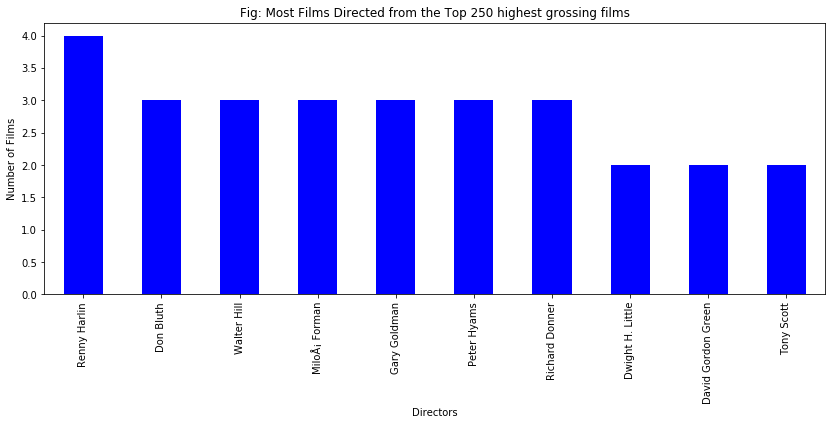

In [191]:
def top10directors(x):
    top250 = df[[x,'director']].sort_values(x).head(250)  
    top250 = top250.reset_index(); 
    column_values = list(top250.director)
    director = []
    for col_val in column_values:
        s = str(col_val)
        director.extend(s.split('|'))
    a = pd.Series(director)
    a.value_counts().head(10).plot(kind = 'bar',figsize=(14,5), color = 'Blue' );

#calling above function
top10directors('profit')
plt.xlabel('Directors')
plt.ylabel('Number of Films')
plt.title('Fig: Most Films Directed from the Top 250 highest grossing films')


The above chart shows the directors who have directed the most films of the top 250 highest grossing films in the dataset. You can see that Renny Harlin has directed the most with 4 movies in the top 250 highest grossin films.

# Question #4: In what month are the most movies released of the top 500 most profitable films?

Text(0.5, 1.0, 'Fig: Months by which the most films are released or the top 500 most profitable films')

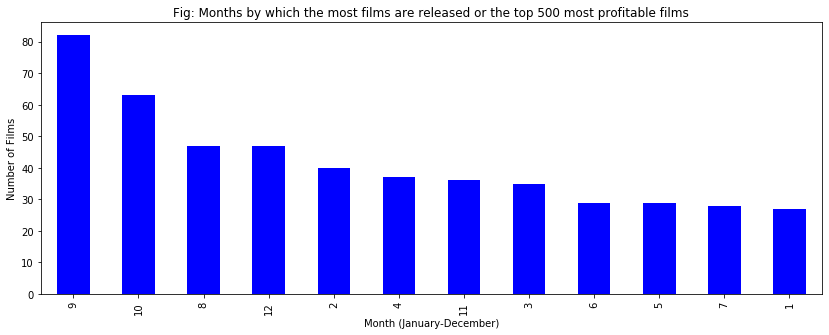

In [192]:
def moviemonth(x):
    top500 = df[[x,'release_month']].sort_values(x).head(500)  
    top500 = top500.reset_index(); 
    column_values = list(top500.release_month)
    release_month = []
    for col_val in column_values:
        s = str(col_val)
        release_month.extend(s.split('|'))
    a = pd.Series(release_month)
    a.value_counts().head(12).plot(kind = 'bar',figsize=(14,5), color = 'Blue' );

#calling above function
moviemonth('profit')
plt.xlabel('Month (January-December)')
plt.ylabel('Number of Films')
plt.title('Fig: Months by which the most films are released or the top 500 most profitable films')

As you can see from th chart, late summer to early fall are the months in which the most profitable movies are released. September comes in first, followed by October and August. January has the least releases of any month.

<a id='conclusions'></a>
## Conclusions

**Question 1:** What kinds of properties are associated with the highest grossing films?
- Revenue has the strongest correlation with popularity, budget, and vote count. Vote averge has little do with the revenue of a film

**Question 2:** Which actors/actresses have appeared in the most films within the top 250 most profitable films?
- Nicholas Cage has appeared in the most movies of the top 250 most profitable films in the dataset. Catherine Zeta Jones has appeared in the most among all actresses.

**Question 3:** Who has directed the most films of the top 250 most profitable films?
- Renny Harlin has directed the most movies of the top 250 most profitable films in the dataset.

**Question 4:** In what month are the most movies released of the top 500 most profitable films?
- Late summer to early fall tends to be the time of year when the biggest blockbusters are release. September, October, and August respectively had the most release of films in the top 500 most profitable. 




## Limitations

There are a few limitations to my dataset to consider when evaluating my results. The first being that while revenue is adjusted for inflation, over time the cost of a movie ticket has increased more than the rate of inflation. For example, if it costs \\$10 today to see a movie, in 1920 it may have only cost \\$4 even when adjusted for inflation. Seeing movies has just become more expensive relative to everything else. This needs to be considered when evlauting the profit of a movie because the ratios of revenue to budgets is different.

The other thing to consider is that the cast of each film in the dataset was only limited to the top billing actors and actresses. This means there could be an actor or actress that has appeared in more films in the top 250 films but they may have played a smaller role and not have received top billing. 
